# Final Assignment, Coursera IBM Data Science Capstone

## This notebook will be used to create and share all requirements from the last course

### 1) First assignment : Import librairies

In [1]:
!pip install numpy --upgrade
!pip install pandas
import pandas as pd
import numpy as np

     |████████████████████████████████| 15.3 MB 17.7 MB/s eta 0:00:01
ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.0 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


### 2) Second assignment : Let's go Toronto

#### a)  Part 1 - Scrapping Wikipedia

##### Import BS and requests, define Next Step to automatically stop in case of error

In [3]:
from bs4 import BeautifulSoup
import requests
next_step = True

In [4]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html_data = requests.get(url)

##### Use BeautifulSoup to parse url

In [5]:
soup = BeautifulSoup(html_data.text, 'html.parser')

##### The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

In [6]:
toronto_neighborhoods_source = pd.DataFrame(columns=["PostalCode", "Borough", "Neighbourhood"])

##### Get table from url. Wikipedia uses the class "wikitable sortable" to store the data we need

In [7]:
table = soup.find("table", { "class" : "wikitable sortable" }).find_all("tr")

##### Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [8]:
for row in table:
    col = row.find_all("td")
    if len(col) > 0:
        cells = row.find_all("td")
        PostalCode = cells[0].get_text(strip=True) #strip = True removes "\n" at the end of each text value
        Borough = cells[1].get_text(strip=True)
        Neighbourhood = cells[2].get_text(strip=True)
        if(Borough != "Not assigned"): #we remove "Not assigned" boroughs
            toronto_neighborhoods_source = toronto_neighborhoods_source.append({"PostalCode":PostalCode, "Borough":Borough, "Neighbourhood":Neighbourhood}, ignore_index=True)


##### Check dataframe head

In [9]:
toronto_neighborhoods_source.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


##### More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.

In [10]:
if (sum(toronto_neighborhoods_source.groupby(['PostalCode']).count()["Borough"]) == toronto_neighborhoods_source["PostalCode"].count()) & next_step:
    print("Already combined, go next step")
else:
    print("Something to do")
    next_step = False
#Seems to be done in Wikipedia table, count of rows grouped by PostalCode = count of rows without groups

Already combined, go next step


##### If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.

In [11]:
if (toronto_neighborhoods_source[toronto_neighborhoods_source["Neighbourhood"] == "Not assigned"].count()["PostalCode"]) == 0 & next_step:
    print("No not assigned neighborhood")
else:
    print("Something to do")
    next_step = False
#No "Not assigned" neighborhood with "Assigned" borough

No not assigned neighborhood


##### In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [12]:
print(toronto_neighborhoods_source.shape)

(103, 3)


#### b) Part 2 - We now need to get the latitude and the longitude coordinates of each neighborhood

##### Import geocoder

In [13]:
!pip install geocoder
import geocoder # import geocoder
import json

     |████████████████████████████████| 98 kB 9.2 MB/s  eta 0:00:01


##### Start to retrieve the coordinates using geocoder with Bing api

In [14]:
# initialize your variable to None
location = None
lat_long_df = pd.DataFrame(columns = ["PostalCode","Latitude", "Longitude"])
lim = 0

nbPostalCode = toronto_neighborhoods_source.shape[0]

for i in range(nbPostalCode):
    # loop until you get the coordinates of each postal code in the dataframe
    PostalCode = toronto_neighborhoods_source.iloc[i]["PostalCode"]
    address = ('{}, Toronto, Ontario'.format(PostalCode))
    
    location = geocoder.bing(address, key="AleEpOyasZ0iz0IAQvg1-IlnUBkCFWNNZxogPQ7azEB3Ztt8MOzf3P7X2Unxbcm8")
    result = json.dumps(location.json)
    data = json.loads(result)

    if(data["status"] == "OK"):
        Latitude = data["lat"]
        Longitude = data["lng"]
        print(address, " OK")
        lat_long_df = lat_long_df.append({"PostalCode":PostalCode, "Latitude":Latitude, "Longitude":Longitude}, ignore_index=True)
    else:
        Latitude = 0
        Longitude = 0
        print(address, " KO")


M3A, Toronto, Ontario  OK
M4A, Toronto, Ontario  OK
M5A, Toronto, Ontario  OK
M6A, Toronto, Ontario  OK
M7A, Toronto, Ontario  OK
M9A, Toronto, Ontario  OK
M1B, Toronto, Ontario  OK
M3B, Toronto, Ontario  OK
M4B, Toronto, Ontario  OK
M5B, Toronto, Ontario  OK
M6B, Toronto, Ontario  OK
M9B, Toronto, Ontario  OK
M1C, Toronto, Ontario  OK
M3C, Toronto, Ontario  OK
M4C, Toronto, Ontario  OK
M5C, Toronto, Ontario  OK
M6C, Toronto, Ontario  OK
M9C, Toronto, Ontario  OK
M1E, Toronto, Ontario  OK
M4E, Toronto, Ontario  OK
M5E, Toronto, Ontario  OK
M6E, Toronto, Ontario  OK
M1G, Toronto, Ontario  OK
M4G, Toronto, Ontario  OK
M5G, Toronto, Ontario  OK
M6G, Toronto, Ontario  OK
M1H, Toronto, Ontario  OK
M2H, Toronto, Ontario  OK
M3H, Toronto, Ontario  OK
M4H, Toronto, Ontario  OK
M5H, Toronto, Ontario  OK
M6H, Toronto, Ontario  OK
M1J, Toronto, Ontario  OK
M2J, Toronto, Ontario  OK
M3J, Toronto, Ontario  OK
M4J, Toronto, Ontario  OK
M5J, Toronto, Ontario  OK
M6J, Toronto, Ontario  OK
M1K, Toronto

##### Check data in json with coordinates

In [15]:
print(lat_long_df)

    PostalCode   Latitude  Longitude
0          M3A  43.756123 -79.329636
1          M4A  43.726780 -79.310738
2          M5A  43.655354 -79.365044
3          M6A  43.721996 -79.445915
4          M7A  43.663910 -79.388733
..         ...        ...        ...
98         M8X  43.652699 -79.511276
99         M4Y  43.666286 -79.382446
100        M7Y  43.651894 -79.381714
101        M8Y  43.633709 -79.496521
102        M8Z  43.629711 -79.517479

[103 rows x 3 columns]


##### Check coordinates dataframe size vs wikipedia dataframe size

In [16]:
if(lat_long_df.shape[0] == toronto_neighborhoods_source.shape[0]) & next_step:
    print("Merge is possible, data can be slightely differents because of Bing geocoder")
else:
    print("Need to import csv")
    lat_long_df = pd.read_csv("https://cocl.us/Geospatial_data")

Merge is possible, data can be slightely differents because of Bing geocoder


##### Finally, merge coordinates with wikipedia data

In [17]:
toronto_with_lat_long = pd.merge(toronto_neighborhoods_source, lat_long_df, on=['PostalCode'])
toronto_with_lat_long.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.756123,-79.329636
1,M4A,North York,Victoria Village,43.726780,-79.310738
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.655354,-79.365044
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.721996,-79.445915
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.663910,-79.388733


#### c) Part 3 - Explore and cluster the neighborhoods in Toronto

##### Import depedencies

In [18]:
!pip install folium --upgrade
import folium

     |████████████████████████████████| 94 kB 6.4 MB/s  eta 0:00:01


##### Let's start by the map of neighbourhood

In [19]:
# create map of Toronto using latitude and longitude values
address = ('Toronto, Ontario')
location = geocoder.bing(address, key="AleEpOyasZ0iz0IAQvg1-IlnUBkCFWNNZxogPQ7azEB3Ztt8MOzf3P7X2Unxbcm8")
result = json.dumps(location.json)
data = json.loads(result)

if(data["status"] == "OK"):
    Latitude = data["lat"]
    Longitude = data["lng"]
    print(address, " OK")

map_toronto = folium.Map(location=[Latitude, Longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(toronto_with_lat_long['Latitude'], toronto_with_lat_long['Longitude'], toronto_with_lat_long['Borough'], toronto_with_lat_long['Neighbourhood']):
    html = "<b>" + borough + "</b>" + "<br>" + "<i>" + neighbourhood.replace(",", "\n") + "</i>"
    iframe = folium.IFrame(html=html, width=200, height=100)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=popup,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Toronto, Ontario  OK


##### Next, we need to retrieve Foursquare venues in each borough (200 max per borough)

In [20]:
toronto_venues = pd.DataFrame(columns = ["PostalCode", "Venue", "VenueCategory"])

ACCESS_TOKEN = 'CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK'
RADIUS = 500
LIMIT = 200
VERSION = '20180605'

for postal, latitude, longitude in zip(toronto_with_lat_long["PostalCode"], toronto_with_lat_long["Latitude"], toronto_with_lat_long["Longitude"]):
    url = 'https://api.foursquare.com/v2/venues/explore?oauth_token={}&ll={},{}&v={}&radius={}&limit={}'.format(ACCESS_TOKEN, latitude, longitude, VERSION, RADIUS, LIMIT)
    print(url)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for res in results:
        venue = res['venue']['name']
        category = res['venue']['categories'][0]['name']
        toronto_venues = toronto_venues.append({"PostalCode":postal, "Venue":venue, "VenueCategory":category}, ignore_index=True)

https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.75612258911133,-79.32963562011719&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.72677993774414,-79.31073760986328&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.65535354614258,-79.36504364013672&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.72199630737305,-79.44591522216797&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.663909912109375,-79.38873291015625&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=

https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.671199798583984,-79.31649017333984&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.648780822753906,-79.37895965576172&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.71388244628906,-79.48784637451172&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.758705139160156,-79.56130981445312&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.72624969482422,-79.23149871826172&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&l

https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.71898651123047,-79.5845947265625&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.82689666748047,-79.22557067871094&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.66793441772461,-79.37020111083984&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.648582458496094,-79.3817138671875&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.6526985168457,-79.51127624511719&v=20180605&radius=500&limit=200
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=43.

##### Let's count venues by neighbourhood

In [21]:
toronto_venues.groupby('PostalCode').count()

,Venue,VenueCategory
PostalCode,,
M1B,4,4
M1C,1,1
M1E,46,46
M1G,5,5
M1H,4,4
...,...,...
M9N,7,7
M9P,10,10
M9R,6,6


##### Find out how many unique categories

In [22]:
print('There are {} uniques categories.'.format(len(toronto_venues['VenueCategory'].unique())))

There are 322 uniques categories.


##### One hot encoding (transforms categories to dummy)

In [23]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['PostalCode'] = toronto_venues['PostalCode'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()
#toronto_onehot[toronto_onehot['PostalCode'] == 'Marble Hill']

,PostalCode,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Size of this onehot dataframe

In [24]:
toronto_onehot.shape

(3594, 323)

##### Group by neighbourhood and mean of frequency

In [25]:
toronto_grouped = toronto_onehot.groupby('PostalCode').mean().reset_index()
toronto_grouped

,PostalCode,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M1B,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M1C,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M1E,0.021739,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.021739,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M1G,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M1H,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,M9N,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,M9P,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,M9R,0.000000,0.00000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,M9V,0.000000,0.03125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Check the shape

In [26]:
toronto_grouped.shape

(101, 323)

##### Function to return most common venues

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Now let's create the new dataframe and display the top 10 venues for each neighborhood

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Fast Food Restaurant,Home Service,Construction & Landscaping,Hobby Shop,Falafel Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant
1,M1C,Park,Yoga Studio,Falafel Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space
2,M1E,Pizza Place,Electronics Store,Restaurant,Medical Center,Fast Food Restaurant,Pharmacy,Coffee Shop,Grocery Store,Bank,ATM
3,M1G,Coffee Shop,Business Service,Park,Insurance Office,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service
4,M1H,Construction & Landscaping,Gaming Cafe,Trail,Yoga Studio,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant


##### Cluster neighbourhood

In [29]:
toronto_grouped_clustering = toronto_grouped.drop('PostalCode', 1)

toronto_grouped_clustering

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.021739,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.021739,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.000000,0.00000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.000000,0.03125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Import KMeans

In [30]:
!pip install sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=1ffd525501ad5d88391bb5862ee533af94757282746a8a497ddb784cd5bc8f05
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


##### Find best cluster number

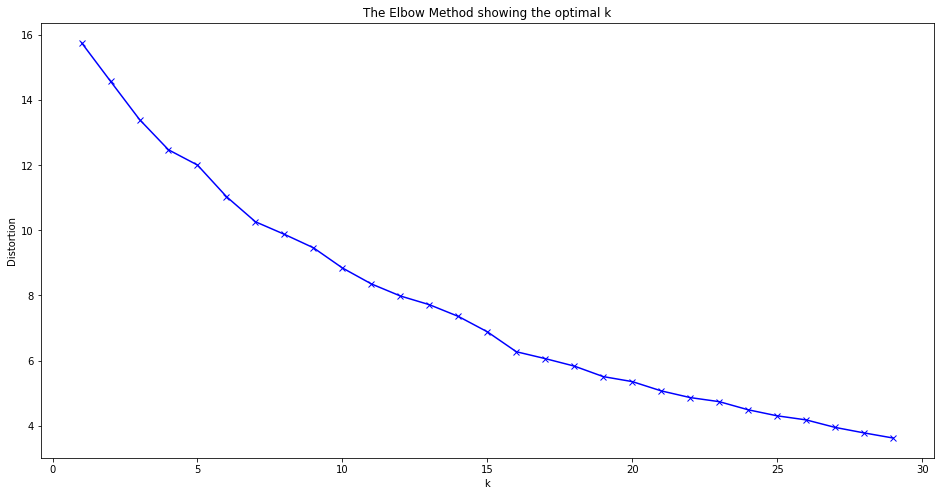

In [31]:
# run k-means clustering
distortions = []
K = range(1,30)
kclusters = 5
for kclusters in K:
    kmeans = KMeans(n_clusters=kclusters, random_state=0, init='k-means++').fit(toronto_grouped_clustering)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### The best K seems to be 8 ?

In [32]:
kclusters = 8
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

kmeans.labels_

array([1, 0, 4, 4, 1, 7, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 0, 4, 4, 6, 1, 4,
       4, 3, 4, 4, 1, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 1, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4], dtype=int32)

##### Let's merge all those data

In [33]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_final = pd.merge(neighborhoods_venues_sorted, lat_long_df, on=['PostalCode'])
toronto_final = pd.merge(toronto_final, toronto_neighborhoods_source, on=['PostalCode'])
toronto_final.head()

,Cluster Labels,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Borough,Neighbourhood
0,1,M1B,Fast Food Restaurant,Home Service,Construction & Landscaping,Hobby Shop,Falafel Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,43.806847,-79.201469,Scarborough,"Malvern, Rouge"
1,0,M1C,Park,Yoga Studio,Falafel Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,Event Space,43.787216,-79.152519,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,4,M1E,Pizza Place,Electronics Store,Restaurant,Medical Center,Fast Food Restaurant,Pharmacy,Coffee Shop,Grocery Store,Bank,ATM,43.767628,-79.189026,Scarborough,"Guildwood, Morningside, West Hill"
3,4,M1G,Coffee Shop,Business Service,Park,Insurance Office,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Service,43.769047,-79.218201,Scarborough,Woburn
4,1,M1H,Construction & Landscaping,Gaming Cafe,Trail,Yoga Studio,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,43.768265,-79.237984,Scarborough,Cedarbrae


##### Import matplotlib colors and modules

In [34]:
import matplotlib.cm as cm
import matplotlib.colors as colors

##### And finally, create the map

In [35]:
# create map
# create map of Toronto using latitude and longitude values
address = ('Toronto, Ontario')
location = geocoder.bing(address, key="AleEpOyasZ0iz0IAQvg1-IlnUBkCFWNNZxogPQ7azEB3Ztt8MOzf3P7X2Unxbcm8")
result = json.dumps(location.json)
data = json.loads(result)

if(data["status"] == "OK"):
    Latitude = data["lat"]
    Longitude = data["lng"]
    print(address, " OK")
    
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, borough, cluster in zip(toronto_final['Latitude'], toronto_final['Longitude'], toronto_final['Neighbourhood'], toronto_final['Borough'], toronto_final['Cluster Labels']):
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    html = "<b>" + borough + "</b>" + "<br>" + "<i>" + neighbourhood.replace(",", "\n") + "</i>" + "</br>" + "Cluster : " + str(cluster)
    iframe = folium.IFrame(html=html, width=200, height=100)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=popup,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Toronto, Ontario  OK


### 3) Third assignment, week 1 : Should I stay or should I go ?

#### - Introduction - where you discuss the business problem and who would be interested in this project

Moving out can be a difficult decision. If you really love the borough you live in, it can be heartbreaker to move out to another borough in another city / state / country. When my company asked me if I was interested in moving out from Lille to Paris, I asked myself if it was a good idea. The main goal of this project is to try to automatically understand what makes your place so special for you, and which borough in a given city could fit with your requirements. So, I'd like to create a tool in which you enter your current address and the city you're wondering about moving out, and which will try to find the best borough to you.

#### - Data - where you describe the data that will be used to solve the problem and the source of the data

##### To be able to make this tool operationnal, we need 4 inputs : 
 - your current location (complete address would be great)
 - the radius in which your favorite venues are located (in kilometers)
 - the city, state, country you're moving out 
 - a radius of distance from this city (you probably won't live at the exact center of the city given by an API) (in kilometers)

With those data, the tool will call Bing Map API to get the latitude and longitude of your current location, then it will find the latitude and longitude of the city you're moving out.

Here is an example of Bing Map API return :  

    <Location>  
      <Name>1 Microsoft Way, Redmond, WA 98052</Name>  
      <Point>  
        <Latitude>47.640120461583138</Latitude>  
        <Longitude>-122.12971039116383</Longitude>  
      </Point>  
      <BoundingBox>  
        <SouthLatitude>47.636257744012461</SouthLatitude>  
        <WestLongitude>-122.13735364288299</WestLongitude>  
        <NorthLatitude>47.643983179153814</NorthLatitude>  
        <EastLongitude>-122.12206713944467</EastLongitude>  
      </BoundingBox>  
      <EntityType>Address</EntityType>  
      <Address>  
        <AddressLine>1 Microsoft Way</AddressLine>  
        <AdminDistrict>WA</AdminDistrict>  
        <AdminDistrict2>King Co.</AdminDistrict2>  
        <CountryRegion>United States</CountryRegion>  
        <FormattedAddress>1 Microsoft Way, Redmond, WA 98052</FormattedAddress>  
        <Locality>Redmond</Locality>  
        <PostalCode>98052</PostalCode>  
      </Address>  
      <Confidence>High</Confidence>  
      <MatchCode>Good</MatchCode>  
      <GeocodePoint>  
        <Latitude>47.640120461583138</Latitude>  
        <Longitude>-122.12971039116383</Longitude>  
        <CalculationMethod>InterpolationOffset</CalculationMethod>  
        <UsageType>Display</UsageType>  
      </GeocodePoint>  
      <GeocodePoint>  
        <Latitude>47.640144601464272</Latitude>  
        <Longitude>-122.12976671755314</Longitude>  
        <CalculationMethod>Interpolation</CalculationMethod>  
        <UsageType>Route</UsageType>  
      </GeocodePoint>  
    </Location>  


Bing Map API returns a json with a lot of data including latitude and longitude of a given address or city. We'll then create virtual boroughs around the center of the city you're moving out thanks to a grid tool : 

![Image of grid](https://reivaxweb.me/Coursera/grid_on_map.jpg)

With the explore function of the foursquare API, the tool will find all venues in the radius you defined around your place, and will then do the same for each virtual borough generated by the grid tool. This API gets catergory of hundreds of venues, and those categories will help to find common data between your current address and the new place : 

           "venue": {
              "id": "4c079d740ed3c928b6be797d",
              "name": "Cour Carrée du Louvre",
              "location": {
                "address": "Rue de Rivoli",
                "crossStreet": "Place du Louvre",
                "lat": 48.8603598795578,
                "lng": 2.3385429382324214,
                "labeledLatLngs": [
                  {
                    "label": "display",
                    "lat": 48.8603598795578,
                    "lng": 2.3385429382324214
                  }
                ],
                "distance": 192,
                "postalCode": "75001",
                "cc": "FR",
                "city": "Paris",
                "state": "Île-de-France",
                "country": "France",
                "formattedAddress": [
                  "Rue de Rivoli (Place du Louvre)",
                  "75001 Paris"
                ]
              },
              "categories": [
                {
                  "id": "52e81612bcbc57f1066b7a25",
                  "name": "Pedestrian Plaza",
                  "pluralName": "Pedestrian Plazas",
                  "shortName": "Pedestrian Street/Plaza",
                  "icon": {
                    "prefix": "https://ss3.4sqi.net/img/categories_v2/parks_outdoors/default_",
                    "suffix": ".png"
                  },
                  "primary": true
                }
              ],
              "photos": {
                "count": 0,
                "groups": []
              }
            },
            "referralId": "e-0-4c079d740ed3c928b6be797d-0"
          },
          {
            "reasons": {
              "count": 0,
              "items": [
                {
                  "summary": "This spot is popular",
                  "type": "general",
                  "reasonName": "globalInteractionReason"
                }
              ]
            }


A clustering unsupervised algorythm will then try to find virtual boroughs that match with your current address in the new city.


### 3) Third assignment, week 2 : Should I stay or should I go ?

#### - Methodology section - which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why
##### I'll use a kmean approach. I choosed to live in the center of Lille, so I was obviously interested by all venues around the town center of this city, and I wanted to find the same venues in Paris. First, I used Foursquare API to get all venues in a 1 km radius because it's a good distance to me to walk to my favorites venues, then I grouped the category of those venues by borough and created clusters based on those data.

#### - Results section - where you discuss the results
##### The result section is the map with colored clusters and the top ten venues in each borough

#### - Discussion section - where you discuss any observations you noted and any recommendations you can make based on the results
##### At the end of the notebook, after the clustered map

#### - Conclusion section - where you conclude the report
##### At the end of the notebook, after the discussion

##### Let's find Latitude and Longitude of Lille and of each borough in Paris

In [36]:
url = "https://fr.wikipedia.org/wiki/Arrondissements_de_Paris"
html_data = requests.get(url)

In [37]:
soup = BeautifulSoup(html_data.text, 'html.parser')

In [38]:
paris_neighborhoods_source = pd.DataFrame(columns=["PostalCode"])

In [39]:
table = soup.find("table", { "class" : "wikitable sortable alternance" }).find_all("tr")

In [40]:
for row in table:
    col = row.find_all("td")
    if len(col) > 0:
        cells = row.find_all("td")
        PostalCode = cells[0].get_text(strip=True) #strip = True removes "\n" at the end of each text value
        paris_neighborhoods_source = paris_neighborhoods_source.append({"PostalCode":PostalCode}, ignore_index=True)

In [41]:
paris_neighborhoods_source = paris_neighborhoods_source.head(20)

In [42]:
paris_neighborhoods_source.shape

(20, 1)

In [43]:
paris_neighborhoods_source.head(20)

,PostalCode
0,1er
1,2e
2,3e
3,4e
4,5e
5,6e
6,7e
7,8e
8,9e
9,10e


In [44]:
# initialize your variable to None
location = None
lille_paris_with_lat_long = pd.DataFrame(columns = ["PostalCode","Latitude", "Longitude"])
lim = 0

nbPostalCode = paris_neighborhoods_source.shape[0]

for i in range(nbPostalCode):
    # loop until you get the coordinates of each postal code in the dataframe
    PostalCode = paris_neighborhoods_source.iloc[i]["PostalCode"]
    address = ('{} arrondissement, Paris, France'.format(PostalCode))
    
    location = geocoder.bing(address, key="AleEpOyasZ0iz0IAQvg1-IlnUBkCFWNNZxogPQ7azEB3Ztt8MOzf3P7X2Unxbcm8")
    result = json.dumps(location.json)
    data = json.loads(result)

    if(data["status"] == "OK"):
        Latitude = data["lat"]
        Longitude = data["lng"]
        print(address, " OK")
        lille_paris_with_lat_long = lille_paris_with_lat_long.append({"PostalCode":PostalCode, "Latitude":Latitude, "Longitude":Longitude}, ignore_index=True)
    else:
        Latitude = 0
        Longitude = 0
        print(address, " KO")

1er arrondissement, Paris, France  OK
2e arrondissement, Paris, France  OK
3e arrondissement, Paris, France  OK
4e arrondissement, Paris, France  OK
5e arrondissement, Paris, France  OK
6e arrondissement, Paris, France  OK
7e arrondissement, Paris, France  OK
8e arrondissement, Paris, France  OK
9e arrondissement, Paris, France  OK
10e arrondissement, Paris, France  OK
11e arrondissement, Paris, France  OK
12e arrondissement, Paris, France  OK
13e arrondissement, Paris, France  OK
14e arrondissement, Paris, France  OK
15e arrondissement, Paris, France  OK
16e arrondissement, Paris, France  OK
17e arrondissement, Paris, France  OK
18e arrondissement, Paris, France  OK
19e arrondissement, Paris, France  OK
20e arrondissement, Paris, France  OK


##### Let's add Lille to this dataframe

In [45]:
PostalCode = "Lille"
address = ('{}, France'.format(PostalCode))
location = geocoder.bing(address, key="AleEpOyasZ0iz0IAQvg1-IlnUBkCFWNNZxogPQ7azEB3Ztt8MOzf3P7X2Unxbcm8")
result = json.dumps(location.json)
data = json.loads(result)

if(data["status"] == "OK"):
    Latitude = data["lat"]
    Longitude = data["lng"]
    print(address, " OK")
    lille_paris_with_lat_long = lille_paris_with_lat_long.append({"PostalCode":PostalCode, "Latitude":Latitude, "Longitude":Longitude}, ignore_index=True)
else:
    Latitude = 0
    Longitude = 0
    print(address, " KO")

Lille, France  OK


##### Let's check dataframe

In [46]:
lille_paris_with_lat_long

,PostalCode,Latitude,Longitude
0,1er,48.860241,2.341168
1,2e,48.869171,2.340560
2,3e,48.856895,2.350849
3,4e,48.857494,2.351490
4,5e,48.847221,2.344440
5,6e,48.850536,2.332774
6,7e,48.857983,2.315110
7,8e,48.874168,2.311110
8,9e,48.878281,2.336967
9,10e,48.871738,2.357201


##### Mapping Lille and all boroughs in Paris

In [47]:
# create map of Toronto using latitude and longitude values
address = ('France')
location = geocoder.bing(address, key="AleEpOyasZ0iz0IAQvg1-IlnUBkCFWNNZxogPQ7azEB3Ztt8MOzf3P7X2Unxbcm8")
result = json.dumps(location.json)
data = json.loads(result)

if(data["status"] == "OK"):
    Latitude = data["lat"]
    Longitude = data["lng"]
    print(address, " OK")

map_france = folium.Map(location=[Latitude, Longitude], zoom_start=6)

# add markers to map
for lat, lng, postalcode in zip(lille_paris_with_lat_long['Latitude'], lille_paris_with_lat_long['Longitude'], lille_paris_with_lat_long['PostalCode']):
    html = "<b>" + postalcode + "</b>"
    iframe = folium.IFrame(html=html, width=200, height=100)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=popup,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_france)  
    
map_france

France  OK


##### Let's use Foursquare API to get all venues in a radius of 1000 meters around each cluster

In [48]:
lille_paris_venues = pd.DataFrame(columns = ["PostalCode", "Venue", "VenueCategory"])

ACCESS_TOKEN = 'CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK'
RADIUS = 1000
LIMIT = 100
VERSION = '20180605'

for postal, latitude, longitude in zip(lille_paris_with_lat_long["PostalCode"], lille_paris_with_lat_long["Latitude"], lille_paris_with_lat_long["Longitude"]):
    url = 'https://api.foursquare.com/v2/venues/explore?oauth_token={}&ll={},{}&v={}&radius={}&limit={}'.format(ACCESS_TOKEN, latitude, longitude, VERSION, RADIUS, LIMIT)
    print(url)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for res in results:
        venue = res['venue']['name']
        category = res['venue']['categories'][0]['name']
        lille_paris_venues = lille_paris_venues.append({"PostalCode":postal, "Venue":venue, "VenueCategory":category}, ignore_index=True)

https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=48.8602409362793,2.34116792678833&v=20180605&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=48.869171142578125,2.340559959411621&v=20180605&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=48.856895446777344,2.350848913192749&v=20180605&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=48.85749435424805,2.351490020751953&v=20180605&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=48.84722137451172,2.34443998336792&v=20180605&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?oauth_token=CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK&ll=48

In [49]:
lille_paris_venues

,PostalCode,Venue,VenueCategory
0,1er,Cour Carrée du Louvre,Pedestrian Plaza
1,1er,Place du Louvre,Plaza
2,1er,Boutique yam'Tcha,Chinese Restaurant
3,1er,Church of Saint-Germain-l'Auxerrois (Église Sa...,Church
4,1er,Coffee Crêpes,Coffee Shop
...,...,...,...
2095,Lille,Mamaz,Restaurant
2096,Lille,CALM appart hôtel,Resort
2097,Lille,Le Compostelle,French Restaurant
2098,Lille,L'Aéronef,Concert Hall


##### Let's count venue by place

In [50]:
lille_paris_venues.groupby('PostalCode').count()

,Venue,VenueCategory
PostalCode,,
10e,100,100
11e,100,100
12e,100,100
13e,100,100
14e,100,100
15e,100,100
16e,100,100
17e,100,100
18e,100,100


##### Find out how many unique categories

In [51]:
print('There are {} uniques categories.'.format(len(lille_paris_venues['VenueCategory'].unique())))

There are 210 uniques categories.


##### One hot encoding (transforms categories to dummy)

In [52]:
# one hot encoding
lille_paris_onehot = pd.get_dummies(lille_paris_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lille_paris_onehot['PostalCode'] = lille_paris_venues['PostalCode'] 

# move neighborhood column to the first column
fixed_columns = [lille_paris_onehot.columns[-1]] + list(lille_paris_onehot.columns[:-1])
lille_paris_onehot = lille_paris_onehot[fixed_columns]

lille_paris_onehot.head()

,PostalCode,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Women's Store
0,1er,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1er,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1er,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1er,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1er,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Size of this onehot dataframe

In [53]:
lille_paris_onehot.shape

(2100, 211)

##### Group by neighbourhood and mean of frequency

In [54]:
lille_paris_grouped = lille_paris_onehot.groupby('PostalCode').mean().reset_index()
lille_paris_grouped

,PostalCode,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Women's Store
0,10e,0.02,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,...,0.00,0.00,0.00,0.03,0.00,0.02,0.00,0.05,0.00,0.00
1,11e,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.00
2,12e,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00
3,13e,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00
4,14e,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,...,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.01,0.02,0.00
5,15e,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00
6,16e,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,17e,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00
8,18e,0.02,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.00,...,0.00,0.01,0.00,0.02,0.00,0.02,0.01,0.02,0.00,0.00
9,19e,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00


##### Function to return most common venues

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Now let's create the new dataframe and display the top 10 venues for each neighborhood, to have a quick overview of the data

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['PostalCode'] = lille_paris_grouped['PostalCode']

for ind in np.arange(lille_paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lille_paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10e,French Restaurant,Hotel,Wine Bar,Coffee Shop,Bakery,Italian Restaurant,Breakfast Spot,Asian Restaurant,Vegetarian / Vegan Restaurant,Bar
1,11e,French Restaurant,Cocktail Bar,Bar,Coffee Shop,Bakery,Restaurant,Pizza Place,Bistro,Wine Bar,Café
2,12e,French Restaurant,Bistro,Bakery,Hotel,Italian Restaurant,Japanese Restaurant,Gym / Fitness Center,Plaza,Garden,Ice Cream Shop
3,13e,French Restaurant,Hotel,Thai Restaurant,Bakery,Vietnamese Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Dessert Shop,Sushi Restaurant
4,14e,French Restaurant,Hotel,Italian Restaurant,Bar,Restaurant,Vietnamese Restaurant,Bistro,Sushi Restaurant,Bakery,Thai Restaurant
5,15e,French Restaurant,Hotel,Italian Restaurant,Bakery,Lebanese Restaurant,Thai Restaurant,Coffee Shop,Japanese Restaurant,Persian Restaurant,Creperie
6,16e,French Restaurant,Hotel,Italian Restaurant,Bakery,Plaza,Garden,Restaurant,Café,Japanese Restaurant,Pizza Place
7,17e,French Restaurant,Italian Restaurant,Hotel,Bakery,Pastry Shop,Japanese Restaurant,Farmers Market,Seafood Restaurant,Restaurant,Concert Hall
8,18e,French Restaurant,Bistro,Bar,Italian Restaurant,Pizza Place,Café,Plaza,Restaurant,Japanese Restaurant,Sandwich Place
9,19e,French Restaurant,Bar,Café,Italian Restaurant,Japanese Restaurant,Restaurant,Pool,Pizza Place,Park,Diner


##### Cluster neighbourhood (remove PostalCode as it must not influence the kmean)

In [57]:
lille_paris_grouped_clustering = lille_paris_grouped.drop('PostalCode', 1)
lille_paris_grouped_clustering

,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Women's Store
0,0.02,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.03,...,0.00,0.00,0.00,0.03,0.00,0.02,0.00,0.05,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.01,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.00
2,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00
3,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,...,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.01,0.02,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00
6,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00
8,0.02,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.00,0.00,...,0.00,0.01,0.00,0.02,0.00,0.02,0.01,0.02,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00


##### Create clusters with those data

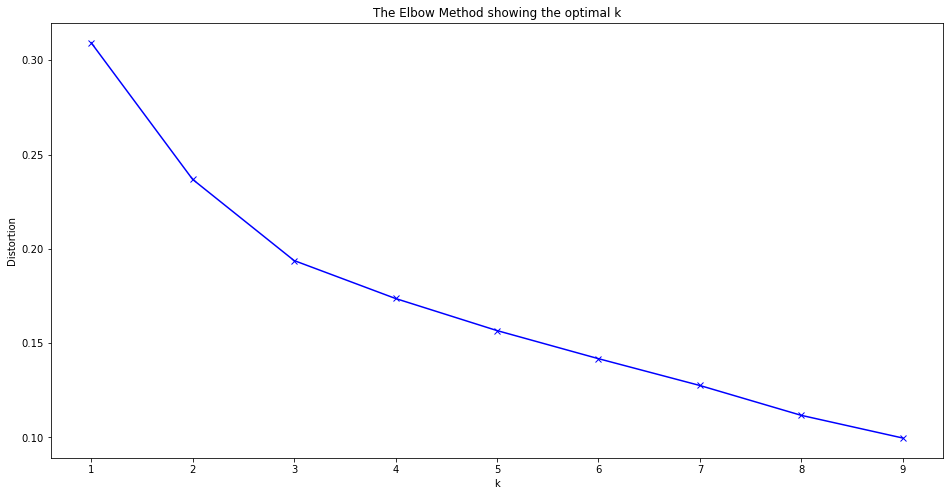

In [58]:
# run k-means clustering
distortions = []
K = range(1,10)

for kclusters in K:
    kmeans = KMeans(n_clusters=kclusters, random_state=0, init='k-means++').fit(lille_paris_grouped_clustering)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### Let's use a 3 clusters kmean

In [59]:
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=0, init='k-means++').fit(lille_paris_grouped_clustering)

kmeans.labels_

array([0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2],
      dtype=int32)

##### Let's merge all those data

In [60]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted

,Cluster Labels,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,10e,French Restaurant,Hotel,Wine Bar,Coffee Shop,Bakery,Italian Restaurant,Breakfast Spot,Asian Restaurant,Vegetarian / Vegan Restaurant,Bar
1,2,11e,French Restaurant,Cocktail Bar,Bar,Coffee Shop,Bakery,Restaurant,Pizza Place,Bistro,Wine Bar,Café
2,0,12e,French Restaurant,Bistro,Bakery,Hotel,Italian Restaurant,Japanese Restaurant,Gym / Fitness Center,Plaza,Garden,Ice Cream Shop
3,1,13e,French Restaurant,Hotel,Thai Restaurant,Bakery,Vietnamese Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Dessert Shop,Sushi Restaurant
4,1,14e,French Restaurant,Hotel,Italian Restaurant,Bar,Restaurant,Vietnamese Restaurant,Bistro,Sushi Restaurant,Bakery,Thai Restaurant
5,1,15e,French Restaurant,Hotel,Italian Restaurant,Bakery,Lebanese Restaurant,Thai Restaurant,Coffee Shop,Japanese Restaurant,Persian Restaurant,Creperie
6,1,16e,French Restaurant,Hotel,Italian Restaurant,Bakery,Plaza,Garden,Restaurant,Café,Japanese Restaurant,Pizza Place
7,1,17e,French Restaurant,Italian Restaurant,Hotel,Bakery,Pastry Shop,Japanese Restaurant,Farmers Market,Seafood Restaurant,Restaurant,Concert Hall
8,2,18e,French Restaurant,Bistro,Bar,Italian Restaurant,Pizza Place,Café,Plaza,Restaurant,Japanese Restaurant,Sandwich Place
9,2,19e,French Restaurant,Bar,Café,Italian Restaurant,Japanese Restaurant,Restaurant,Pool,Pizza Place,Park,Diner


In [61]:
lille_paris_final = pd.merge(neighborhoods_venues_sorted, lat_long_df, on=['PostalCode'])
lille_paris_final.head()

,Cluster Labels,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude


##### And finally, we can create the map

In [62]:
# create map
# create map of France using latitude and longitude values
address = ('France')
location = geocoder.bing(address, key="AleEpOyasZ0iz0IAQvg1-IlnUBkCFWNNZxogPQ7azEB3Ztt8MOzf3P7X2Unxbcm8")
result = json.dumps(location.json)
data = json.loads(result)

if(data["status"] == "OK"):
    Latitude = data["lat"]
    Longitude = data["lng"]
    print(address, " OK")
    
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, postalcode, cluster in zip(lille_paris_final['Latitude'], lille_paris_final['Longitude'], lille_paris_final['PostalCode'], lille_paris_final['Cluster Labels']):
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    html = "<b>" + postalcode + "</b>" + "</br>" + "Cluster : " + str(cluster)
    iframe = folium.IFrame(html=html, width=200, height=100)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=popup,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

France  OK


### Discussion : to improve the model, I could have put my real address instead of Lille, to be more accurate. If I wanted to really use this tool, I would have split Paris in squares of 1 km² sliding each 200m for instance, because here we only have the center of each borough. 

### Conclusion : the tool is really accurate, the chosen boroughs in Paris that seems most similar to Lille are 18th, 19th, 20th and 11th, and my real choice was to move out to 11th !